### Klaszterelemzés 

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Clustering (sűrűség alapú modell). 

##### Fontosabb könyvtárak betöltése

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

C:\Users\erika\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\erika\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Adatok betöltése
df= pd.read_excel("HDI_jo.xlsx")

In [3]:
df

,County,HDI,HDI_modified,HDI_weighted,BMI_mean
0,Vas,0.930258,0.828275,0.863043,28.58
1,Szabolcs-Szatmár-Bereg,0.811876,0.576437,0.597672,30.41
2,Zala,0.820084,0.774539,0.783497,30.50
3,Veszprém,0.868295,0.751246,0.786627,31.66
4,Csongrád-Csanád,0.880785,0.750642,0.775335,21.69
5,Bács-Kiskun,0.894190,0.759333,0.779526,22.83
6,Nógrád,0.813489,0.501370,0.566693,36.67
7,Borsod-Abaúj-Zemplén,0.832700,0.571982,0.637282,21.89
8,Heves,0.835444,0.686818,0.722005,27.33
9,Hajdú-Bihar,0.817093,0.673574,0.695380,29.93


##### Standardizálás

In [7]:
# Az adatok standardizálása
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['HDI', 'BMI_mean']])

#### DBSCAN klaszterezés

In [8]:
dbscan = DBSCAN(eps=0.7, min_samples=3)  # zajos adatokat eredményezett
#dbscan = DBSCAN(eps=0.7, min_samples=2)  # Növeljük az eps-t és csökkentjük a min_samples-t
df['Cluster'] = dbscan.fit_predict(scaled_data)

- eps: Ez a paraméter a távolságot határozza meg, amelyen belül két adatpontot összekapcsolhatunk, hogy azok ugyanabba a klaszterbe tartozzanak.
- min_samples: Ez a paraméter azt határozza meg, hogy hány pontnak kell minimum lennie egy klaszterhez.

#### Eredmények megjelenítése

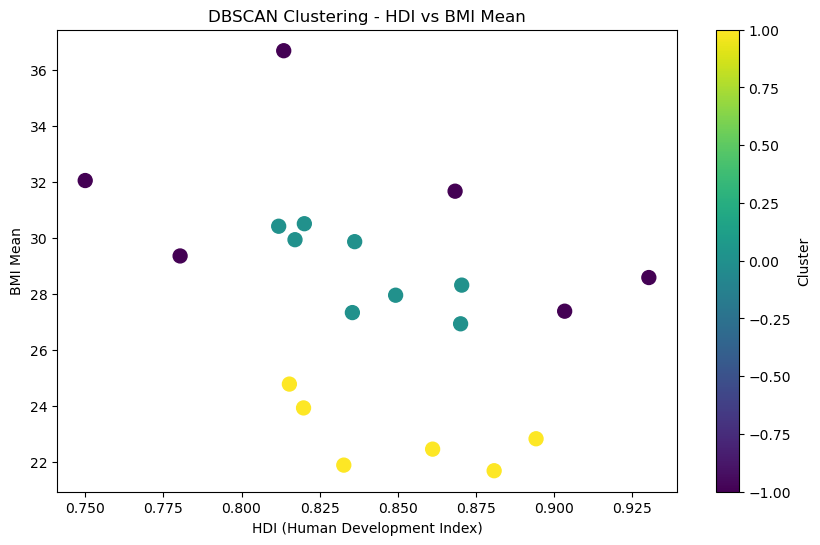

In [9]:
#Klaszterek megjelenítése
plt.figure(figsize=(10, 6))
plt.scatter(df['HDI'], df['BMI_mean'], c=df['Cluster'], cmap='viridis', s=100)
plt.title('DBSCAN Clustering - HDI vs BMI Mean')
plt.xlabel('HDI (Human Development Index)')
plt.ylabel('BMI Mean')
plt.colorbar(label='Cluster')
plt.show()

#### Eredmények kiíratása

In [10]:
# Eredmények kiíratása
print(df[['County', 'HDI', 'BMI_mean', 'Cluster']])

                    County       HDI  BMI_mean  Cluster
0                      Vas  0.930258     28.58       -1
1   Szabolcs-Szatmár-Bereg  0.811876     30.41        0
2                     Zala  0.820084     30.50        0
3                 Veszprém  0.868295     31.66       -1
4          Csongrád-Csanád  0.880785     21.69        1
5              Bács-Kiskun  0.894190     22.83        1
6                   Nógrád  0.813489     36.67       -1
7     Borsod-Abaúj-Zemplén  0.832700     21.89        1
8                    Heves  0.835444     27.33        0
9              Hajdú-Bihar  0.817093     29.93        0
10    Jász-Nagykun-Szolnok  0.849277     27.95        0
11                 Baranya  0.870056     26.93        0
12                  Somogy  0.861109     22.46        1
13       Győr-Moson-Sopron  0.903336     27.38       -1
14                   Fejér  0.815296     24.78        1
15                 főváros  0.870413     28.31        0
16                    Pest  0.836183     29.86  